In [1]:
#this is a revised version of the code. the functions are run in the bottom using user input,
#which will be replaced by client side interaction


import pytraj as pt

In [2]:
#this function is what gathers the calculations over random timeframes with given number of samples and timesteps
import datetime
import random

def gatherData(traj):
    timeSteps = input("Enter number of timesteps: ")
    timeSteps = int(timeSteps)
    if timeSteps>len(traj):
        print("Error: timestep selection is greater than timesteps in the trajectory file")
        return
    sampleAmount = input("Enter sample amount:")
    sampleAmount = int(sampleAmount)
    
    startTime = datetime.datetime.now()
    print("beginning proccess with ",timeSteps," timesteps, and ", sampleAmount, " samples, at ", startTime)
    
    samples=[]
    for i in range(sampleAmount):
        start = random.randint(0, (len(traj)-1)-timeSteps)
        end = start+timeSteps
        
        trajSample = traj[start:end]
        fluctSample = pt.atomicfluct(trajSample)
        corrSample = [pt.atomiccorr(trajSample)]
        
        dataArray = [trajSample, fluctSample, corrSample]
        samples.append(dataArray)
    
    print("Finished after: ", datetime.datetime.now()-startTime)
    return samples

In [55]:
import os
import IPython as py
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
#Searches the os for files that have .nc or .prmtop in their name.


def searchDir(dirArray):
    viableFiles = []
    for i in dirArray:
        length=len(i)
        trajIndex = i.find(".nc")
        topIndex = i.find(".prmtop")
        
        if length-(trajIndex)==3 or length-(topIndex)==7:
            if trajIndex != -1:
                viableFiles.append(i)
            if topIndex != -1:
                viableFiles.append(i)
            
    return viableFiles

def searchForFiles():
    path="/Users/"
    print(os.listdir(path))
    
    while True:
        py.display.clear_output()
        print("Path: ", path)
        dir = os.listdir(path)
        print("Directories: ")
        for i in dir:
            print("   ",i)
        print("useable files: ")
        udir=searchDir(dir)
        for i in udir:
            print("   ",i)
        
        
        command = input("choose a directory, type 'stop', or type 'choose' ")
        
        
        if command == 'choose':
            trajFile = input("type the name of the .nc file")
            topFile = input("type the name of the .prmtop file")
            
            return trajFile, topFile
        
        if command == 'stop':
            break
        for i in dir:
            if command==i:
                path=os.path.join(path, i)
            
        

In [5]:
def doEverything():
    trajFile, topFile = searchForFiles()
    
    traj = pt.load(trajFile, topFile)
    
    data = gatherData(traj)
    
    return traj

In [6]:
traj = pt.load('heat1.nc', 'TRPcage.prmtop')

In [8]:
xyz = []
for i in traj.xyz:
    xyz.append(i[0])

In [13]:
import nglview as ngl

In [14]:
traj.superpose()
view = ngl.show_pytraj(traj)
view

NGLWidget(max_frame=199)

In [15]:
fluct = pt.atomicfluct(traj)

In [22]:
def customFluct(trajArray):
    fluct = 0
    
    
    
    refX = 0
    refY = 0
    refZ = 0
    for i in trajArray:
        refX+=i[0]
        refY+=i[1]
        refZ+=i[2]
    refX, refY, refZ = refX/len(trajArray), refY/len(trajArray), refZ/len(trajArray)
    
    sum = 0
    for i in trajArray:
        difX = i[0]-refX
        difY = i[1]-refY
        difZ = i[2]-refZ
        
        difX = pow(difX, 2)
        difY = pow(difY, 2)
        difZ = pow(difZ, 2)
        
        partial_sum = difX+difY+difZ
        sum+=partial_sum
    
    fluct = sum/len(trajArray)
    fluct = pow(fluct, 1/2)
            
            
        
    return fluct

In [23]:
customFluct(xyz)

1.2488742742192607

In [82]:
testArray = []
for i in range(304):
    arr = []
    for j in traj.xyz:
        arr.append(j[i])
    testArray.append(arr)

In [98]:
np.shape(testArray)

(304, 200, 3)

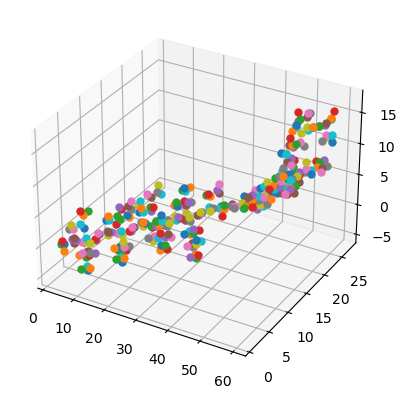

In [61]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in traj.xyz[0]:
    

    
    ax.scatter(i[0],i[1],i[2], s=25)
       
plt.show()

In [29]:
##replicating the atomic corr function!!!

In [134]:
corr = pt.atomiccorr(traj,byres=False)
np.shape(corr)

(304, 304)

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [147]:
def customCorr(fullTrajArray, a, b):
    a_cord=[]
    b_cord=[]
    for i in range(len(fullTrajArray)):
        a_cord.append(fullTrajArray[i][a])
        b_cord.append(fullTrajArray[i][b])
    #print(np.shape(a_cord))
    
    a_dif = []
    for i in range(len(a_cord)):
        if i!=0:
            #print(a_cord[i][0],a_cord[i][0]-a_cord[i-1][0])
            a_dif.append([a_cord[i][0]-a_cord[i-1][0],a_cord[i][1]-a_cord[i-1][1],a_cord[i][2]-a_cord[i-1][2]])
    #print(np.shape(a_dif))
    
    b_dif = []
    for i in range(len(b_cord)):
        if i!=0:
            #print(a_cord[i][0],a_cord[i][0]-a_cord[i-1][0])
            b_dif.append([b_cord[i][0]-b_cord[i-1][0],b_cord[i][1]-b_cord[i-1][1],b_cord[i][2]-b_cord[i-1][2]])
    #print(np.shape(b_dif))
    
    
    
    #print(a_dif[0],b_dif[0])
    dot = np.dot(a_dif[0], b_dif[0])
    #print(dot)
    
    
    a_mag = math.pow((math.pow(a_dif[0][0],2)+math.pow(a_dif[0][1],2)+math.pow(a_dif[0][2],2)),1/2)
    b_mag = math.pow((math.pow(b_dif[0][0],2)+math.pow(b_dif[0][1],2)+math.pow(b_dif[0][2],2)),1/2)
    
    #print(a_mag, b_mag)
    
    result = dot/(a_mag*b_mag)
    #print(result)
    
    
    
    sm = []
    for i in range(len(a_dif)):
        a_mag = math.pow((math.pow(a_dif[i][0],2)+math.pow(a_dif[i][1],2)+math.pow(a_dif[i][2],2)),1/2)
        b_mag = math.pow((math.pow(b_dif[i][0],2)+math.pow(b_dif[i][1],2)+math.pow(b_dif[i][2],2)),1/2)
        
        dot = np.dot(a_dif[i], b_dif[i])
        
        result = dot/(a_mag*b_mag)
        sm.append(result)
    #print(sm)
    return (sum(sm)/len(a_dif))

In [146]:
customCorr(traj.xyz,0,1)

0.9437144968414274


In [149]:
for i in range(len(corr[0])):
    print("Ours: ", customCorr(traj.xyz,0,i)," CPPTraj: ", corr[0][i])

Ours:  1.0  CPPTraj:  0.0
Ours:  0.9437144968414274  CPPTraj:  0.9437145
Ours:  0.9627130480317564  CPPTraj:  0.96271306
Ours:  0.9339144458006567  CPPTraj:  0.9339144
Ours:  0.9121775874414216  CPPTraj:  0.91217756
Ours:  0.8383713390465523  CPPTraj:  0.83837134
Ours:  0.6397981959086457  CPPTraj:  0.6397982
Ours:  0.5901137126156977  CPPTraj:  0.5901137
Ours:  0.5191450460712612  CPPTraj:  0.5191451
Ours:  0.38304635320486136  CPPTraj:  0.38304636
Ours:  0.37509472013177925  CPPTraj:  0.3750947
Ours:  0.06744835093226555  CPPTraj:  0.06744835
Ours:  -0.03232632961467085  CPPTraj:  -0.03232633
Ours:  0.06661156054462967  CPPTraj:  0.06661156
Ours:  0.7002046417452243  CPPTraj:  0.7002047
Ours:  0.47200337077466503  CPPTraj:  0.47200337
Ours:  0.4824551243860297  CPPTraj:  0.48245513
Ours:  0.38575024845981765  CPPTraj:  0.38575026
Ours:  0.2339323305384343  CPPTraj:  0.23393233
Ours:  0.19624977836092578  CPPTraj:  0.19624978
Ours:  0.12056981093648493  CPPTraj:  0.12056981
Ours:  0.1

<ipython-input-147-6256f5c4b526>:47: RuntimeWarning: invalid value encountered in double_scalars
  result = dot/(a_mag*b_mag)
<ipython-input-147-6256f5c4b526>:35: RuntimeWarning: invalid value encountered in double_scalars
  result = dot/(a_mag*b_mag)


Ours:  0.1985428847406991  CPPTraj:  0.19854288
Ours:  0.1672552637204532  CPPTraj:  0.16725527
Ours:  0.07958687434131297  CPPTraj:  0.07958687
Ours:  -0.00017618011538749446  CPPTraj:  -0.00017617883
Ours:  0.06074572045184022  CPPTraj:  0.06074572
Ours:  0.09149375654475812  CPPTraj:  0.091493756
Ours:  0.06384255828524057  CPPTraj:  0.06384256
Ours:  0.03646456359480396  CPPTraj:  0.036464565
Ours:  0.022860407218163972  CPPTraj:  0.022860408
Ours:  -0.034229886018081135  CPPTraj:  -0.034229886
Ours:  0.00964399825568255  CPPTraj:  0.009643997
Ours:  0.06586048240199845  CPPTraj:  0.06586048
Ours:  0.03774763912337122  CPPTraj:  0.03774764
Ours:  0.04330685863969534  CPPTraj:  0.043306857
Ours:  0.005930374966662031  CPPTraj:  0.005930375
Ours:  0.20411027517077499  CPPTraj:  0.20411028
Ours:  0.09806865838951216  CPPTraj:  0.09806866
Ours:  nan  CPPTraj:  nan
Ours:  0.14416740956518093  CPPTraj:  0.14416741
Ours:  0.06534204287276209  CPPTraj:  0.06534204
Ours:  0.0365150455432580

In [125]:
samplecorr = pt.atomiccorr(traj[0:2], byres=False)
print(np.shape(samplecorr))

(304, 304)


In [126]:
samplecorr[0]

array([ 0.        ,  0.8997354 ,  0.99886817, ..., -0.1980295 ,
        0.        ,  0.21693046], dtype=float32)